In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [8]:
# Loading the diabetes dataset
diabetes_dataset = pd.read_csv('diabetes.csv')


In [9]:
# Displaying the first 5 rows of the dataset
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Checking the shape of the dataset
diabetes_dataset.shape

(768, 9)

In [11]:
# Getting statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Checking the distribution of the Outcome variable
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
# Grouping by Outcome to see mean values
diabetes_dataset.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
# Data Cleansing: Replacing zero values in critical columns with median
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_clean:
    diabetes_dataset[column] = diabetes_dataset[column].replace(0, diabetes_dataset[column].median())

In [16]:
# Verifying no zero values remain in critical columns
(diabetes_dataset[columns_to_clean] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

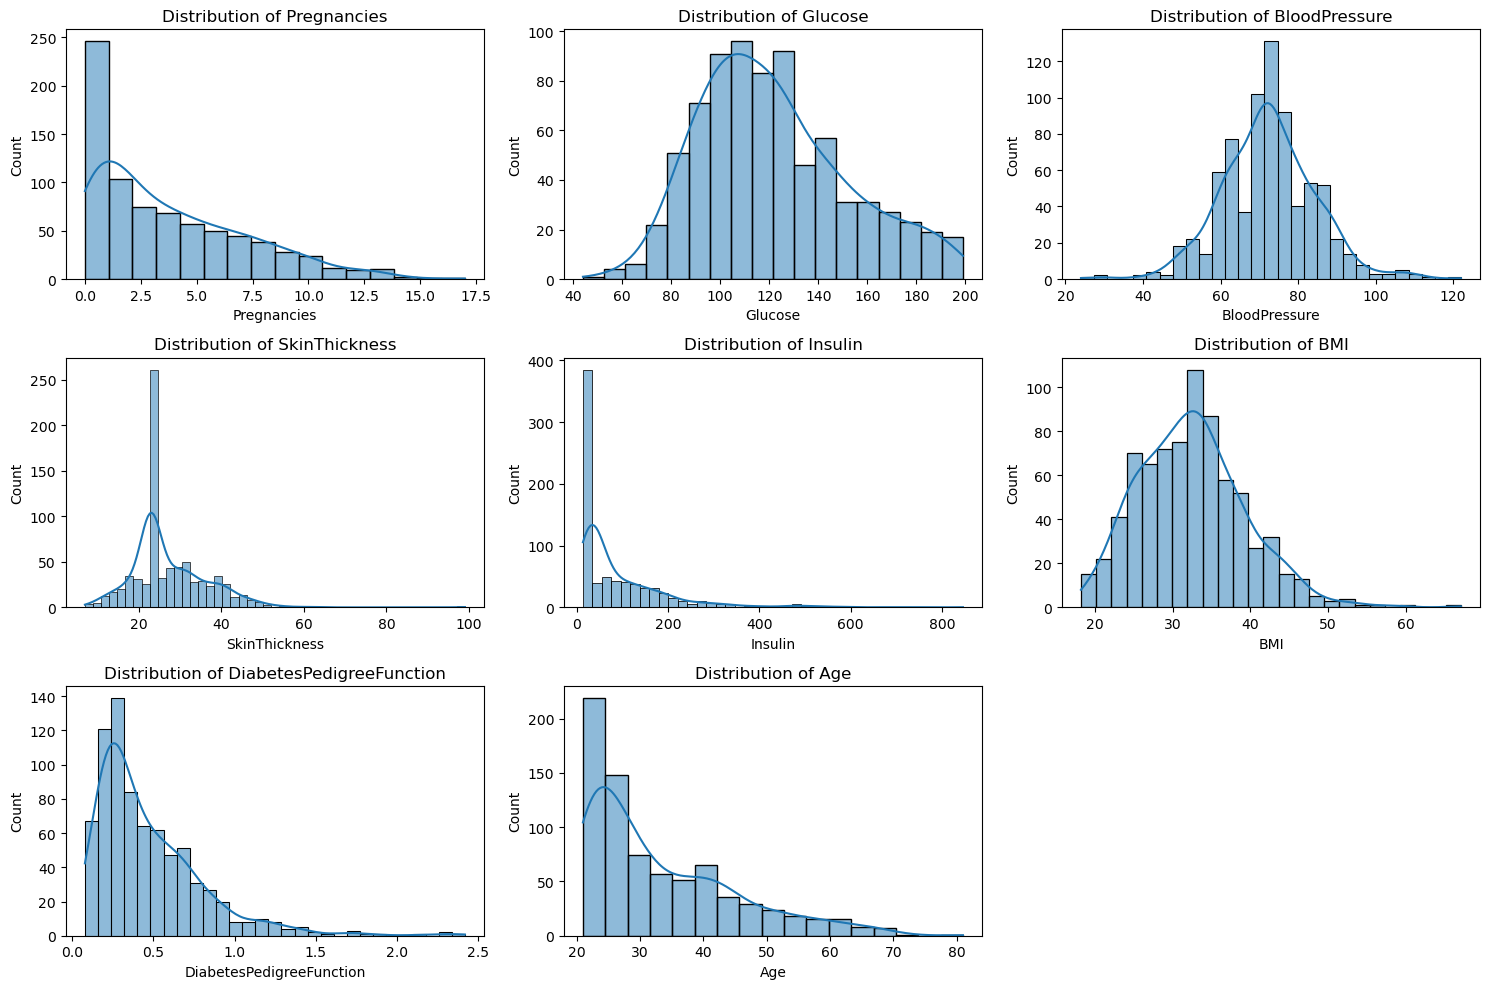

In [17]:
# Visualizing the distribution of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_dataset.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_dataset[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()

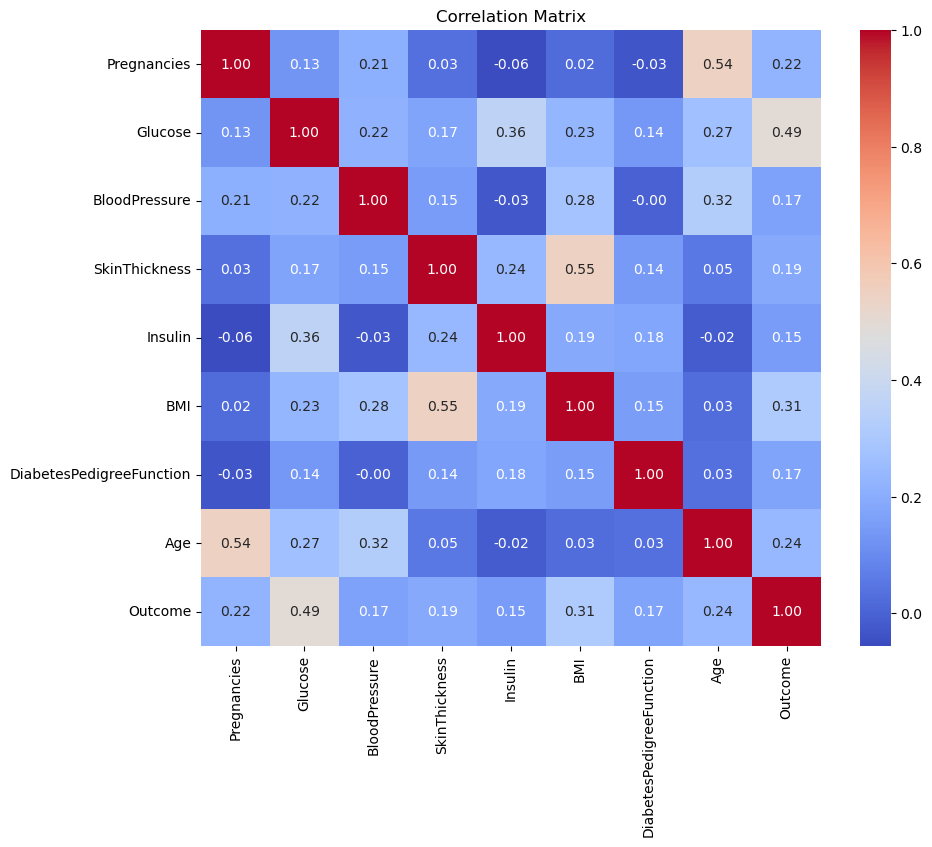

In [18]:
# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

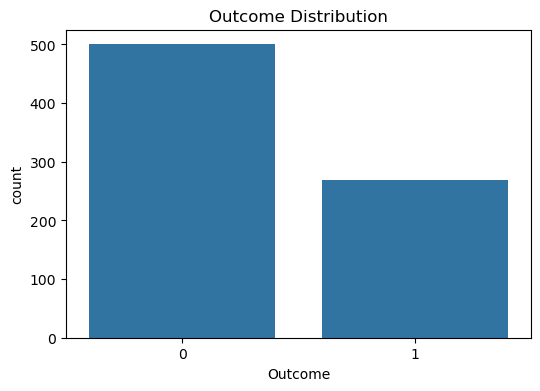

In [19]:
# Visualizing Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Outcome Distribution')
plt.savefig('outcome_distribution.png')
plt.show()

In [20]:
# Separating features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']


In [21]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
# Checking the shapes of the splits
print("\nShapes of data splits:")
print("X:", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape)


Shapes of data splits:
X: (768, 8) X_train: (614, 8) X_test: (154, 8)


In [23]:
# Training the Support Vector Machine Classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Predicting on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("\nAccuracy score of the training data:", training_data_accuracy)


Accuracy score of the training data: 0.7785016286644951


In [25]:
# Predicting on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of the test data:", test_data_accuracy)

Accuracy score of the test data: 0.7727272727272727
